# CAPM EUA

In [28]:
from scipy import stats
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

### S&P500 ETF

In [29]:
spy = web.DataReader('SPY', ds_yahoo, start, end)

### Carteira de Ações

In [30]:
tickers = ['LB', 'M', 'AMZN']

lb = web.DataReader(tickers[0], ds_yahoo, start, end)
m = web.DataReader(tickers[1], ds_yahoo, start, end)
amzn = web.DataReader(tickers[2], ds_yahoo, start, end)

### Acumulado

In [31]:
# Mercado
spy['Acumulado'] = spy['Adj Close'] / spy['Adj Close'].iloc[0]

# Carteira
lb['Acumulado'] = lb['Adj Close'] / lb['Adj Close'].iloc[0]
m['Acumulado'] = m['Adj Close'] / m['Adj Close'].iloc[0]
amzn['Acumulado'] = amzn['Adj Close'] / amzn['Adj Close'].iloc[0]

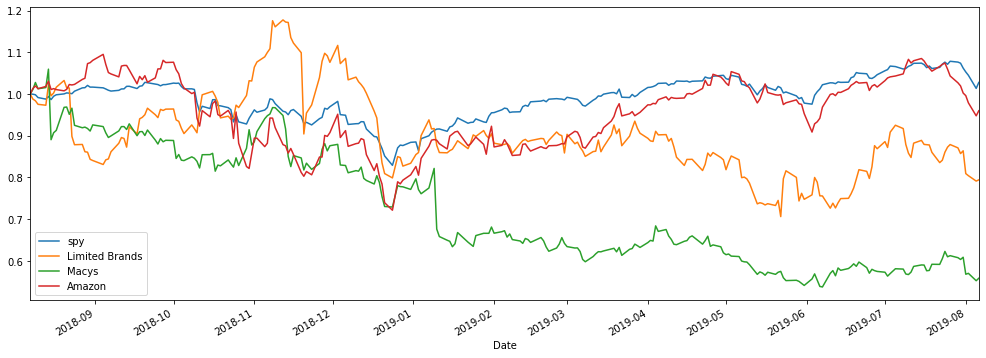

In [54]:
spy['Acumulado'].plot(label='spy', figsize=(17,6))
lb['Acumulado'].plot(label='Limited Brands')
m['Acumulado'].plot(label='Macys')
amzn['Acumulado'].plot(label='Amazon')
plt.legend();

# Calculando o Retorno Diário de cada ação

In [33]:
# Mercado
spy['Retorno Diário'] = spy['Adj Close'].pct_change(1)

# Carteira
lb['Retorno Diário'] = lb['Adj Close'].pct_change(1)
m['Retorno Diário'] = m['Adj Close'].pct_change(1)
amzn['Retorno Diário'] = amzn['Adj Close'].pct_change(1)

# Calculando o Retorno Diário de toda a Carteira

### Normalizando o retorno diário de cada ativo do portfólio

In [34]:
for acao_df in (lb, m, amzn):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

### Alocando cada ativo com um peso específico

In [35]:
# Pesos atuais
pesos = [.334, .334, .334]

for acao_df, alocacao in zip((lb, m, amzn), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

### Posição de cada ativo no portfólio

In [36]:
for acao_df in (lb, m, amzn):
    acao_df['Posicao'] = acao_df['Alocacao'] * 8000

In [37]:
todas_posicoes = [lb['Posicao'], m['Posicao'], amzn['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

In [38]:
portfolio_posicao.columns = ['LB', 'M', 'AMZN']

In [39]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [40]:
portfolio_posicao['Retorno Diário'] = portfolio_posicao['Total'].pct_change(1)

### Carteira EUA x S&P500

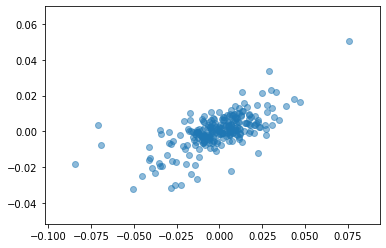

In [41]:
plt.scatter(portfolio_posicao['Retorno Diário'], spy['Retorno Diário'], alpha=0.5);

In [42]:
beta_p, alpha_p, r_value_p, p_value_p, std_err_p = stats.linregress(portfolio_posicao['Retorno Diário'].iloc[1:],
                                                                    spy['Retorno Diário'].iloc[1:])

In [43]:
print('beta: {}'.format(beta_p))
print('alpha: {}'.format(alpha_p))
print('r_value: {}'.format(r_value_p))
print('p_value: {}'.format(p_value_p))
print('std_err: {}'.format(std_err_p))

beta: 0.351091616648355
alpha: 0.0004590240220630952
r_value: 0.6762477762944823
p_value: 9.045938686676602e-35
std_err: 0.02428646223274803


### Limited Brands x S&P500

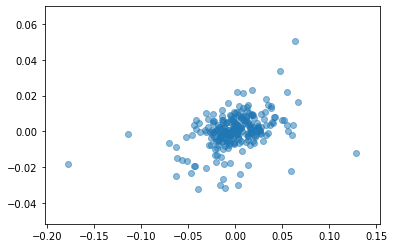

In [44]:
plt.scatter(lb['Retorno Diário'], spy['Retorno Diário'], alpha=0.5);

In [45]:
beta_lb, alpha_lb, r_value_lb, p_value_lb, std_err_lb = stats.linregress(lb['Retorno Diário'].iloc[1:],
                                                                         spy['Retorno Diário'].iloc[1:])

In [46]:
print('beta: {}'.format(beta_lb))
print('alpha: {}'.format(alpha_lb))
print('r_value: {}'.format(r_value_lb))
print('p_value: {}'.format(p_value_lb))
print('std_err: {}'.format(std_err_lb))

beta: 0.133983140626603
alpha: 0.00022582304548036
r_value: 0.3870797264183534
p_value: 2.3216190444041967e-10
std_err: 0.02026639921254158


### Macy's x S&P500

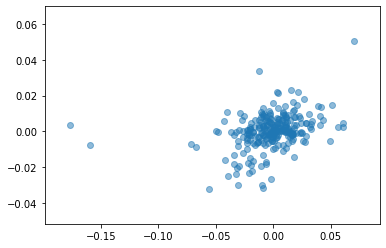

In [47]:
plt.scatter(m['Retorno Diário'], spy['Retorno Diário'], alpha=0.5);

In [48]:
beta_f, alpha_f, r_value_f, p_value_f, std_err_f = stats.linregress(m['Retorno Diário'].iloc[1:],
                                                                    spy['Retorno Diário'].iloc[1:])

In [49]:
print('beta: {}'.format(beta_f))
print('alpha: {}'.format(alpha_f))
print('r_value: {}'.format(r_value_f))
print('p_value: {}'.format(p_value_f))
print('std_err: {}'.format(std_err_f))

beta: 0.13610365226245918
alpha: 0.00042764388004443165
r_value: 0.35527310732714884
p_value: 7.52215799903657e-09
std_err: 0.022739604543127675


## Amazon x S&P500

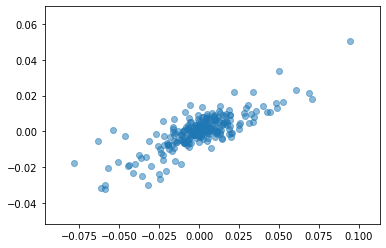

In [50]:
plt.scatter(amzn['Retorno Diário'], spy['Retorno Diário'], alpha=0.5);

In [51]:
beta_a, alpha_a, r_value_a, p_value_a, std_err_a = stats.linregress(amzn['Retorno Diário'].iloc[1:],
                                                                    spy['Retorno Diário'].iloc[1:])

In [52]:
print('beta: {}'.format(beta_a))
print('alpha: {}'.format(alpha_a))
print('r_value: {}'.format(r_value_a))
print('p_value: {}'.format(p_value_a))
print('std_err: {}'.format(std_err_a))

beta: 0.3589610852666764
alpha: 0.00012861313619135637
r_value: 0.8044571414850871
p_value: 4.998149539834462e-58
std_err: 0.016831114838019863


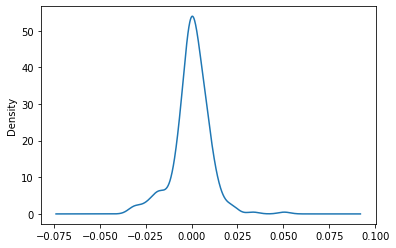

In [55]:
spy['Retorno Diário'].plot(kind='kde')